In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [43]:
heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [44]:
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#descriptive Statistics of  Data 

In [45]:
heart_data.shape

(299, 13)

In [46]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [47]:
#categorize the age column

#heart_data['age'] = ['adult' if x >=65 else 'geriatric' for x in heart_data['age']]
             
#change the type in age

heart_data['age'] = heart_data['age'].astype(int)


Statistics

In [48]:
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [49]:
heart_data[heart_data.duplicated()==True]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


## Data visualization

In [50]:
def distribution(data, feature, ax=None):
    if ax is None:
        plt.figure(figsize=(5,5))
        ax= plt.gca()

    sns.histplot(data=data,x=feature, kde = True, ax=ax)

    ax.set_title(f'Distribution of {feature}', size = 15)
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('count')

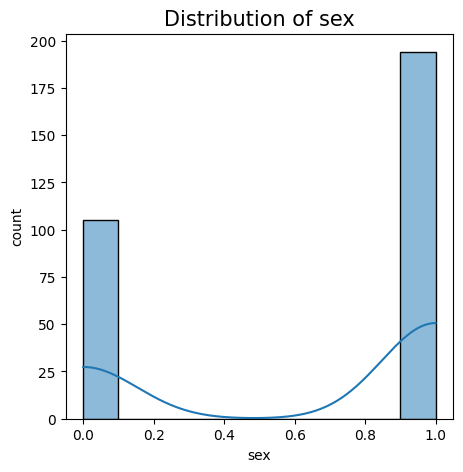

In [51]:
distribution(heart_data, feature='sex')

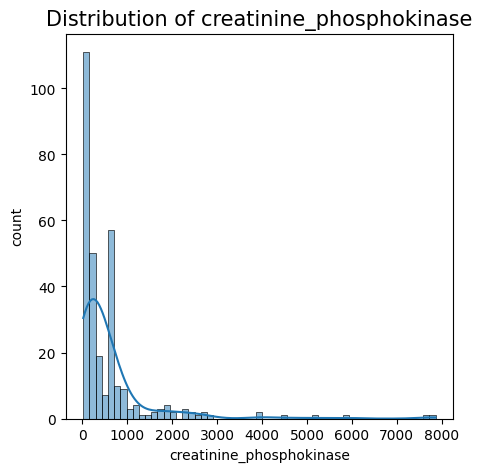

In [52]:
distribution(heart_data, feature='creatinine_phosphokinase')

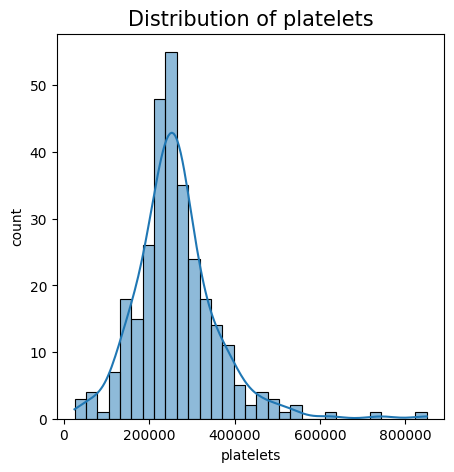

In [53]:
distribution(heart_data, feature='platelets')

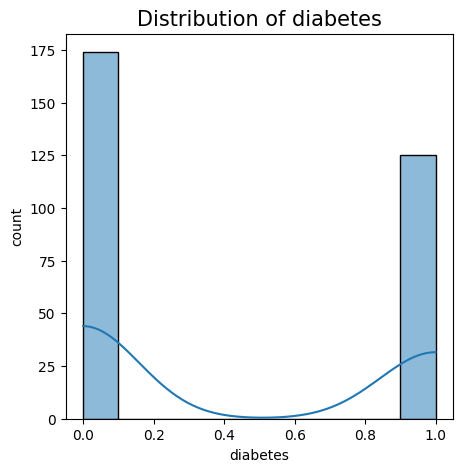

In [54]:
distribution(heart_data, feature='diabetes')

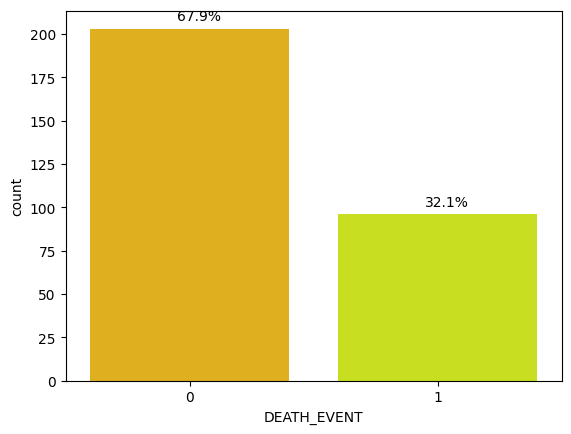

In [55]:
ax = sns.countplot(x='DEATH_EVENT', data = heart_data, palette=["#FFBF00", "#DFFF00"] )
total = len(heart_data["DEATH_EVENT"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

In [56]:
def count_col(data, feature, palette, ax=None):
    if ax is None:
        plt.figure(figsize=(15,5))
        ax=plt.gca()


    sns.countplot(data=data, x=feature, hue='DEATH_EVENT',palette=palette,
                  order=data[feature].value_counts().index, ax=ax)
    
    ax.set_title(f'Number of {feature}', size=12)
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('count')

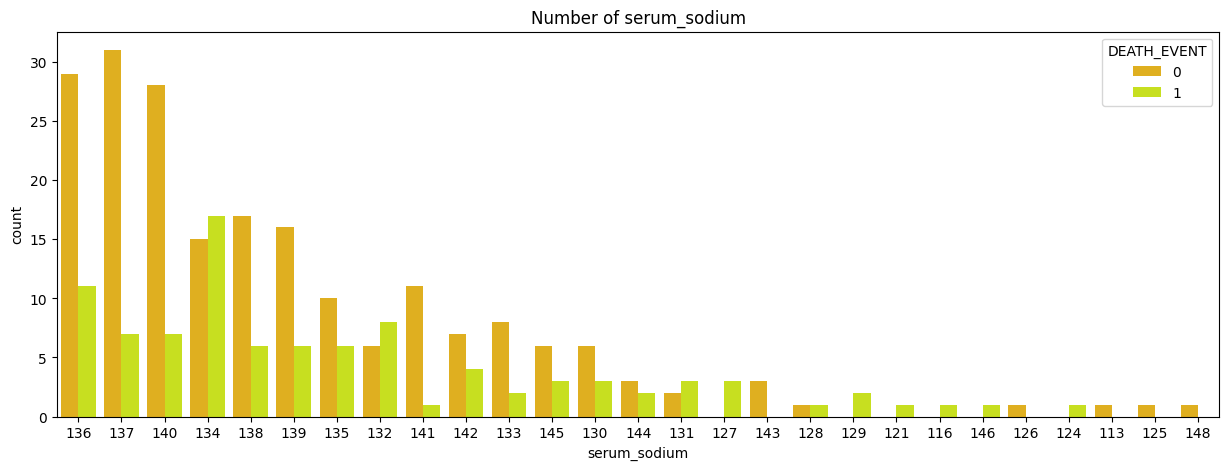

In [57]:
count_col(heart_data, feature='serum_sodium', palette=["#FFBF00", "#DFFF00"])

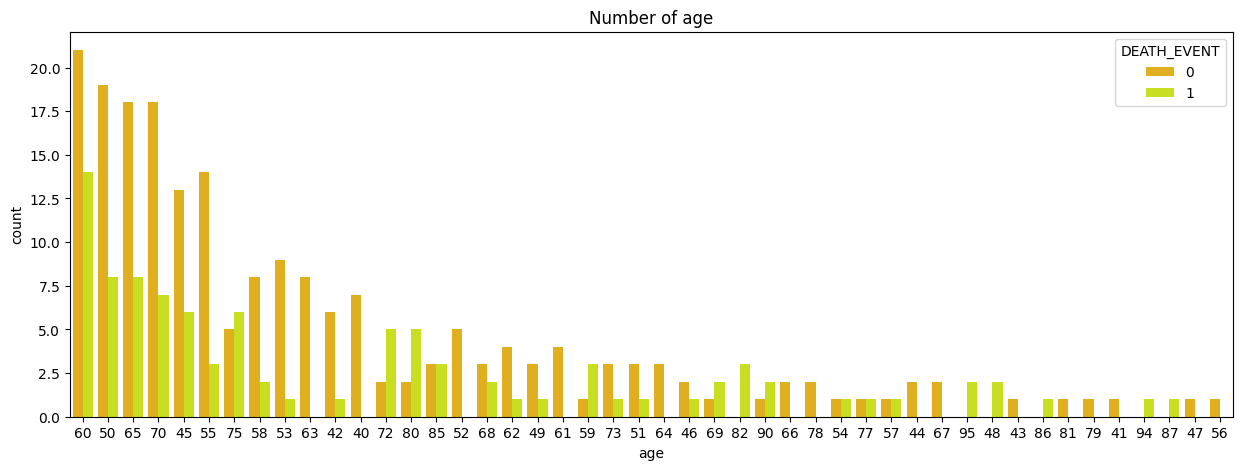

In [58]:
count_col(heart_data, feature='age', palette=["#FFBF00", "#DFFF00"])

In [59]:
num_col = heart_data[['creatinine_phosphokinase',	'ejection_fraction','platelets','serum_creatinine','serum_sodium',	'time']]
num_col.head()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,582,20,265000.00,1.9,130,4
1,7861,38,263358.03,1.1,136,6
2,146,20,162000.00,1.3,129,7
3,111,20,210000.00,1.9,137,7
4,160,20,327000.00,2.7,116,8


In [60]:
def summary_target(dataframe, target, num_col):
    print(f"{target} ---> {num_col}")
    print(dataframe.groupby(target).agg({num_col: "mean"}))

In [61]:
def summary_target_df(dataframe, target):
  for col in num_col:
    summary_target(dataframe, target, col)

In [62]:
summary_target_df(heart_data, 'DEATH_EVENT')

DEATH_EVENT ---> creatinine_phosphokinase
             creatinine_phosphokinase
DEATH_EVENT                          
0                          540.054187
1                          670.197917
DEATH_EVENT ---> ejection_fraction
             ejection_fraction
DEATH_EVENT                   
0                     40.26601
1                     33.46875
DEATH_EVENT ---> platelets
                 platelets
DEATH_EVENT               
0            266657.489901
1            256381.044792
DEATH_EVENT ---> serum_creatinine
             serum_creatinine
DEATH_EVENT                  
0                    1.184877
1                    1.835833
DEATH_EVENT ---> serum_sodium
             serum_sodium
DEATH_EVENT              
0              137.216749
1              135.375000
DEATH_EVENT ---> time
                   time
DEATH_EVENT            
0            158.339901
1             70.885417


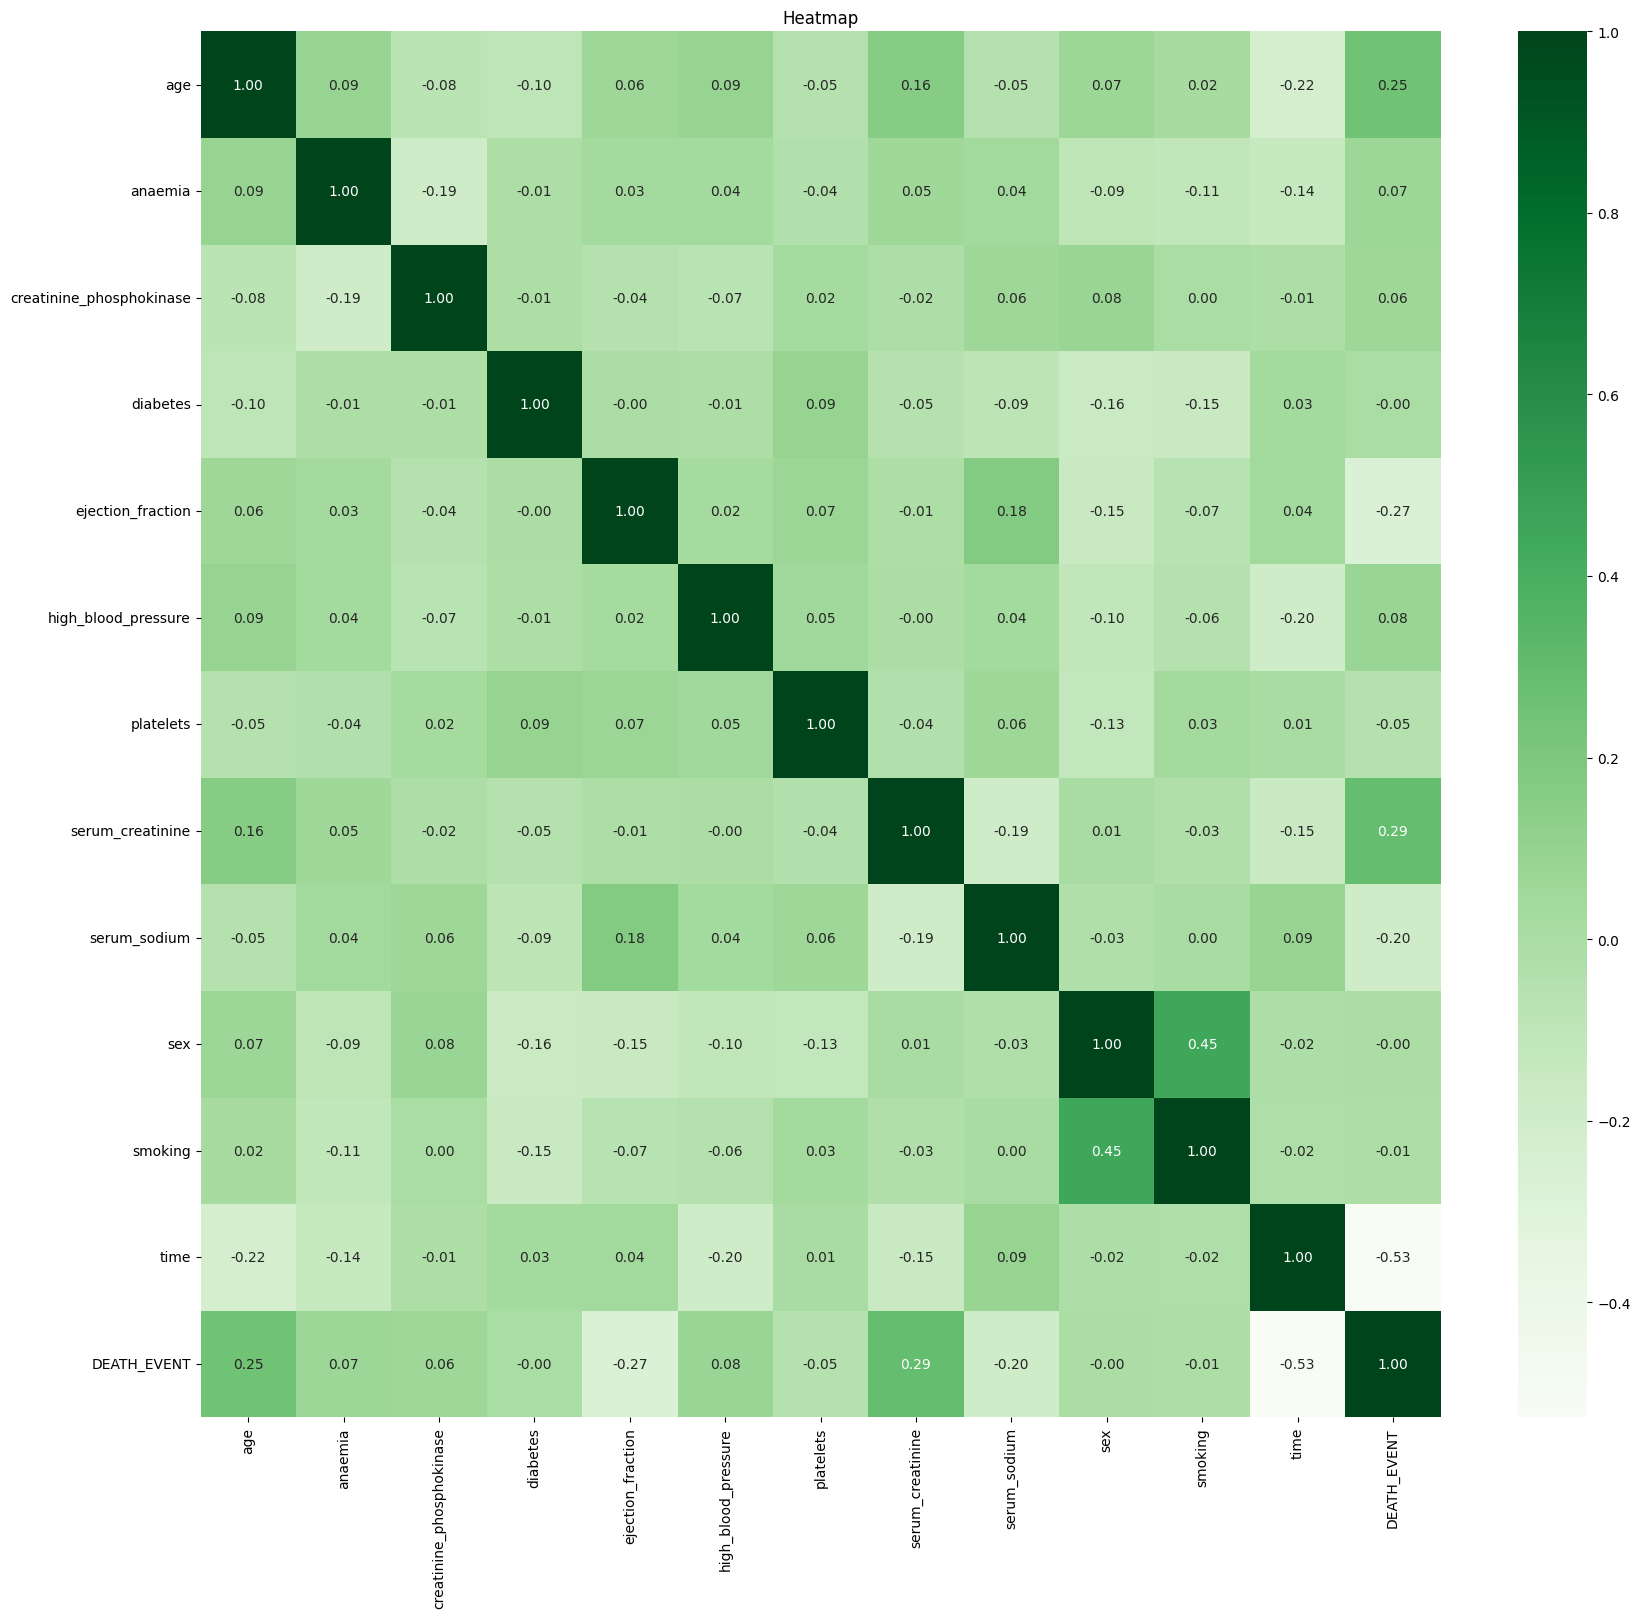

In [63]:
plt.figure(figsize=(20, 18))
sns.heatmap(heart_data.corr(), cmap="Greens", annot=True, fmt=".2f", annot_kws = {"size":10})
plt.title('Heatmap')
plt.show()

## MODELING randomforest

In [64]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from  sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, auc , roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,recall_score,f1_score

In [65]:
heart_main_data = heart_data.copy()

x = heart_main_data.drop(columns='DEATH_EVENT', axis=1)
y = heart_main_data['DEATH_EVENT']

In [66]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state=42)

In [68]:
print(X_test.shape, X_train.shape, Y_train.shape, Y_test.shape)

(75, 12) (224, 12) (224,) (75,)


In [69]:
#standardizing data

non_category = ['creatinine_phosphokinase',	'ejection_fraction','platelets','serum_creatinine','serum_sodium',	'time']

In [70]:
# Making a copy of original data
X_train_og = X_train.copy()
X_test_og = X_test.copy()

# Instantiating standardscaler
scaler = StandardScaler()

# Fitting scaler object on X_train
scaler.fit(X_train[non_category])

# Transforming numeric columns
X_train[non_category] = scaler.transform(X_train[non_category])
# Add the remaining columns back after scaling
X_train = pd.concat([X_train[non_category], X_train.drop(columns=non_category)], axis=1)

# Repeat the same process for X_test
X_test[non_category] = scaler.transform(X_test[non_category])
X_test = pd.concat([X_test[non_category], X_test.drop(columns=non_category)], axis=1)

In [71]:
X_test.head()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,age,anaemia,diabetes,high_blood_pressure,sex,smoking
281,-0.010310,0.125312,-2.211569,1.351840,-0.111808,1.519162,70,0,0,0,1,1
265,-0.303632,-0.305208,1.035353,-0.474469,0.790714,1.390779,50,1,0,0,1,1
164,1.910745,-0.735728,0.743026,-0.271546,0.565084,-0.034274,45,0,1,0,1,0
9,-0.484376,-0.305208,1.306800,8.149767,-0.788700,-1.562033,80,1,0,1,1,1
77,-0.506066,0.125312,-0.269680,-0.170084,0.790714,-0.740381,42,0,1,0,1,0


In [72]:

model = RandomForestClassifier(random_state=42, n_estimators = 1000, criterion="entropy", verbose = 2)

model.fit(X_train, Y_train)

building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 103 of 1000
building tree 104 of 1000
building tree 105 of 1000
building tree 106 of 1000
building tree 107 of 1000
building tree 108 of 1000
building tree 109 of 1000
building tree 110 of 1000
building tree 111 of 1000
building tree 112 of 1000
building tree 113 of 1000
building tree 114 of 1000
building tree 115 of 1000
building tree 116 of 1000
building tree 117 of 1000
building tree 118 of 1000
building tree 119 of 1000
building tree 120 of 1000
building tree 121 of 1000
building tree 122 of 1000
building tree 123 of 1000
building tree 124 of 1000
building tree 125 of 1000
building tree 126 of 1000
building tree 127 of 1000
building tree 128 of 1000
building tree 129 of 1000
building tree 130 of 1000
building tree 131 of 1000
building tree 132 of 1000
building tree 133 of 1000
building tree 134 of 1000
building tree 135 of 1000
building tree 136 of 1000
building tree 137 of 1000
building tree 138 of 1000
building tree 139 of 1000
building tree 140 of 1000
building tre

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


building tree 201 of 1000
building tree 202 of 1000
building tree 203 of 1000
building tree 204 of 1000
building tree 205 of 1000
building tree 206 of 1000
building tree 207 of 1000
building tree 208 of 1000
building tree 209 of 1000
building tree 210 of 1000
building tree 211 of 1000
building tree 212 of 1000
building tree 213 of 1000
building tree 214 of 1000
building tree 215 of 1000
building tree 216 of 1000
building tree 217 of 1000
building tree 218 of 1000
building tree 219 of 1000
building tree 220 of 1000
building tree 221 of 1000
building tree 222 of 1000
building tree 223 of 1000
building tree 224 of 1000
building tree 225 of 1000
building tree 226 of 1000
building tree 227 of 1000
building tree 228 of 1000
building tree 229 of 1000
building tree 230 of 1000
building tree 231 of 1000
building tree 232 of 1000
building tree 233 of 1000
building tree 234 of 1000
building tree 235 of 1000
building tree 236 of 1000
building tree 237 of 1000
building tree 238 of 1000
building tre

[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.6s


building tree 415 of 1000
building tree 416 of 1000
building tree 417 of 1000
building tree 418 of 1000
building tree 419 of 1000
building tree 420 of 1000
building tree 421 of 1000
building tree 422 of 1000
building tree 423 of 1000
building tree 424 of 1000
building tree 425 of 1000
building tree 426 of 1000
building tree 427 of 1000
building tree 428 of 1000
building tree 429 of 1000
building tree 430 of 1000
building tree 431 of 1000
building tree 432 of 1000
building tree 433 of 1000
building tree 434 of 1000
building tree 435 of 1000
building tree 436 of 1000
building tree 437 of 1000
building tree 438 of 1000
building tree 439 of 1000
building tree 440 of 1000
building tree 441 of 1000
building tree 442 of 1000
building tree 443 of 1000
building tree 444 of 1000
building tree 445 of 1000
building tree 446 of 1000
building tree 447 of 1000
building tree 448 of 1000
building tree 449 of 1000
building tree 450 of 1000
building tree 451 of 1000
building tree 452 of 1000
building tre

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    1.2s


building tree 747 of 1000
building tree 748 of 1000
building tree 749 of 1000
building tree 750 of 1000
building tree 751 of 1000
building tree 752 of 1000
building tree 753 of 1000
building tree 754 of 1000
building tree 755 of 1000
building tree 756 of 1000
building tree 757 of 1000
building tree 758 of 1000
building tree 759 of 1000
building tree 760 of 1000
building tree 761 of 1000
building tree 762 of 1000
building tree 763 of 1000
building tree 764 of 1000
building tree 765 of 1000
building tree 766 of 1000
building tree 767 of 1000
building tree 768 of 1000
building tree 769 of 1000
building tree 770 of 1000
building tree 771 of 1000
building tree 772 of 1000
building tree 773 of 1000
building tree 774 of 1000
building tree 775 of 1000
building tree 776 of 1000
building tree 777 of 1000
building tree 778 of 1000
building tree 779 of 1000
building tree 780 of 1000
building tree 781 of 1000
building tree 782 of 1000
building tree 783 of 1000
building tree 784 of 1000
building tre

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42,
                       verbose=2)

## Evalution 

In [73]:
#predict
y_pred_1 = model.predict(X_test)

#predicting accuracy
test_accuracy = accuracy_score(Y_test,y_pred_1)
print(test_accuracy)

0.7333333333333333


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


In [74]:
#get classification report

report = classification_report(Y_test, y_pred_1)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.91      0.80        44
           1       0.79      0.48      0.60        31

    accuracy                           0.73        75
   macro avg       0.75      0.70      0.70        75
weighted avg       0.75      0.73      0.72        75



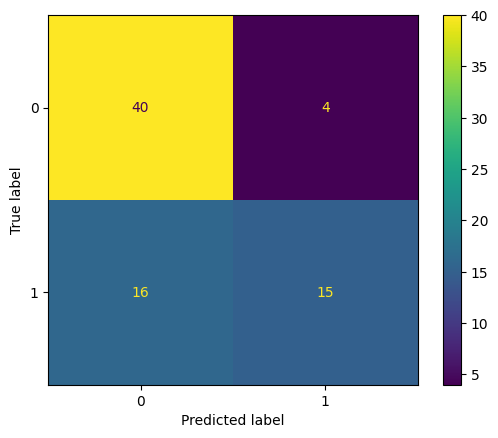

In [75]:
#confusion matrix

cm = confusion_matrix(Y_test, y_pred_1)

#creating display

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [76]:
# Printing True negatives, false positives, false negatives, true positives
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_1).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {accuracy_score(Y_test, y_pred_1)}")
print(f"Precision: {precision_score(Y_test, y_pred_1)}")
print(f"Recall: {recall_score(Y_test, y_pred_1)}")
print(f"f1 score: {f1_score(Y_test, y_pred_1)}")

True positives: 15
False positives: 4
True negatives: 40
False negatives: 16

Accuracy: 0.7333333333333333
Precision: 0.7894736842105263
Recall: 0.4838709677419355
f1 score: 0.6


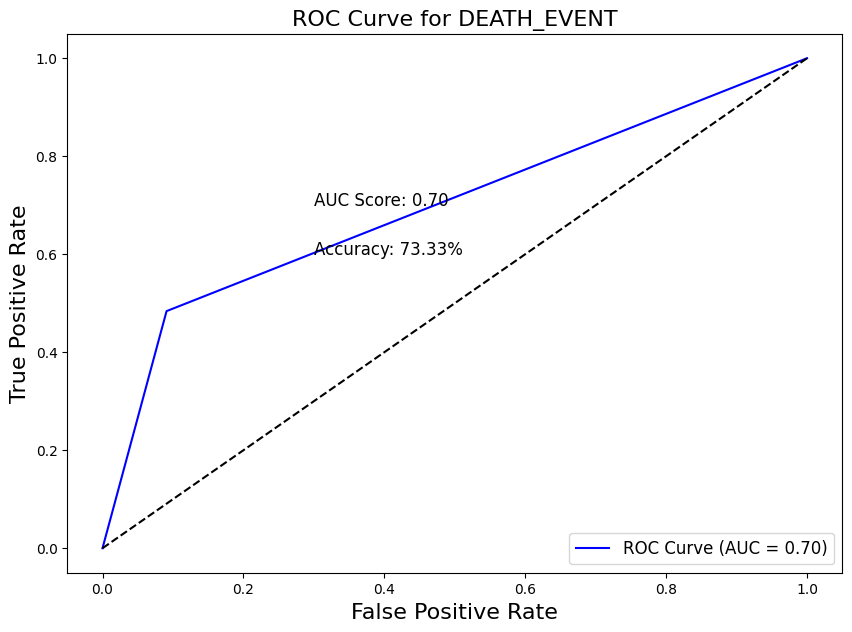

In [77]:
 # Get the ROC curve data
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_1)

# Calculate the AUC score
auc_score = roc_auc_score(Y_test, y_pred_1)

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score, color='b')

# Plot the baseline (random guessing)
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and title
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve for DEATH_EVENT', fontsize=16)

# Add scores and text
plt.text(0.3, 0.7, 'AUC Score: {:.2f}'.format(auc_score), fontsize=12)
plt.text(0.3, 0.6, 'Accuracy: {:.2f}%'.format(test_accuracy * 100), fontsize=12)

# Add legend
plt.legend(loc='lower right', fontsize=12)

# Show the plot
plt.show()

In [78]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, Y_train, cv = 5, scoring='accuracy', verbose=2)

print('Cross-validation scores:{}'.format(cv_scores))

building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 111 of 1000
building tree 112 of 1000
building tree 113 of 1000
building tree 114 of 1000
building tree 115 of 1000
building tree 116 of 1000
building tree 117 of 1000
building tree 118 of 1000
building tree 119 of 1000
building tree 120 of 1000
building tree 121 of 1000
building tree 122 of 1000
building tree 123 of 1000
building tree 124 of 1000
building tree 125 of 1000
building tree 126 of 1000
building tree 127 of 1000
building tree 128 of 1000
building tree 129 of 1000
building tree 130 of 1000
building tree 131 of 1000
building tree 132 of 1000
building tree 133 of 1000
building tree 134 of 1000
building tree 135 of 1000
building tree 136 of 1000
building tree 137 of 1000
building tree 138 of 1000
building tree 139 of 1000
building tree 140 of 1000
building tree 141 of 1000
building tree 142 of 1000
building tree 143 of 1000
building tree 144 of 1000
building tree 145 of 1000
building tree 146 of 1000
building tree 147 of 1000
building tree 148 of 1000
building tre

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


building tree 228 of 1000
building tree 229 of 1000
building tree 230 of 1000
building tree 231 of 1000
building tree 232 of 1000
building tree 233 of 1000
building tree 234 of 1000
building tree 235 of 1000
building tree 236 of 1000
building tree 237 of 1000
building tree 238 of 1000
building tree 239 of 1000
building tree 240 of 1000
building tree 241 of 1000
building tree 242 of 1000
building tree 243 of 1000
building tree 244 of 1000
building tree 245 of 1000
building tree 246 of 1000
building tree 247 of 1000
building tree 248 of 1000
building tree 249 of 1000
building tree 250 of 1000
building tree 251 of 1000
building tree 252 of 1000
building tree 253 of 1000
building tree 254 of 1000
building tree 255 of 1000
building tree 256 of 1000
building tree 257 of 1000
building tree 258 of 1000
building tree 259 of 1000
building tree 260 of 1000
building tree 261 of 1000
building tree 262 of 1000
building tree 263 of 1000
building tree 264 of 1000
building tree 265 of 1000
building tre

[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.6s


building tree 432 of 1000
building tree 433 of 1000
building tree 434 of 1000
building tree 435 of 1000
building tree 436 of 1000
building tree 437 of 1000
building tree 438 of 1000
building tree 439 of 1000
building tree 440 of 1000
building tree 441 of 1000
building tree 442 of 1000
building tree 443 of 1000
building tree 444 of 1000
building tree 445 of 1000
building tree 446 of 1000
building tree 447 of 1000
building tree 448 of 1000
building tree 449 of 1000
building tree 450 of 1000
building tree 451 of 1000
building tree 452 of 1000
building tree 453 of 1000
building tree 454 of 1000
building tree 455 of 1000
building tree 456 of 1000
building tree 457 of 1000
building tree 458 of 1000
building tree 459 of 1000
building tree 460 of 1000
building tree 461 of 1000
building tree 462 of 1000
building tree 463 of 1000
building tree 464 of 1000
building tree 465 of 1000
building tree 466 of 1000
building tree 467 of 1000
building tree 468 of 1000
building tree 469 of 1000
building tre

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    1.1s


building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tre

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 120 of 1000
building tree 121 of 1000
building tree 122 of 1000
building tree 123 of 1000
building tree 124 of 1000
building tree 125 of 1000
building tree 126 of 1000
building tree 127 of 1000
building tree 128 of 1000
building tree 129 of 1000
building tree 130 of 1000
building tree 131 of 1000
building tree 132 of 1000
building tree 133 of 1000
building tree 134 of 1000
building tree 135 of 1000
building tree 136 of 1000
building tree 137 of 1000
building tree 138 of 1000
building tree 139 of 1000
building tree 140 of 1000
building tree 141 of 1000
building tree 142 of 1000
building tree 143 of 1000
building tree 144 of 1000
building tree 145 of 1000
building tree 146 of 1000
building tree 147 of 1000
building tree 148 of 1000
building tree 149 of 1000
building tree 150 of 1000
building tree 151 of 1000
building tree 152 of 1000
building tree 153 of 1000
building tree 154 of 1000
building tree 155 of 1000
building tree 156 of 1000
building tree 157 of 1000
building tre

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


building tree 236 of 1000
building tree 237 of 1000
building tree 238 of 1000
building tree 239 of 1000
building tree 240 of 1000
building tree 241 of 1000
building tree 242 of 1000
building tree 243 of 1000
building tree 244 of 1000
building tree 245 of 1000
building tree 246 of 1000
building tree 247 of 1000
building tree 248 of 1000
building tree 249 of 1000
building tree 250 of 1000
building tree 251 of 1000
building tree 252 of 1000
building tree 253 of 1000
building tree 254 of 1000
building tree 255 of 1000
building tree 256 of 1000
building tree 257 of 1000
building tree 258 of 1000
building tree 259 of 1000
building tree 260 of 1000
building tree 261 of 1000
building tree 262 of 1000
building tree 263 of 1000
building tree 264 of 1000
building tree 265 of 1000
building tree 266 of 1000
building tree 267 of 1000
building tree 268 of 1000
building tree 269 of 1000
building tree 270 of 1000
building tree 271 of 1000
building tree 272 of 1000
building tree 273 of 1000
building tre

[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.6s


building tree 418 of 1000
building tree 419 of 1000
building tree 420 of 1000
building tree 421 of 1000
building tree 422 of 1000
building tree 423 of 1000
building tree 424 of 1000
building tree 425 of 1000
building tree 426 of 1000
building tree 427 of 1000
building tree 428 of 1000
building tree 429 of 1000
building tree 430 of 1000
building tree 431 of 1000
building tree 432 of 1000
building tree 433 of 1000
building tree 434 of 1000
building tree 435 of 1000
building tree 436 of 1000
building tree 437 of 1000
building tree 438 of 1000
building tree 439 of 1000
building tree 440 of 1000
building tree 441 of 1000
building tree 442 of 1000
building tree 443 of 1000
building tree 444 of 1000
building tree 445 of 1000
building tree 446 of 1000
building tree 447 of 1000
building tree 448 of 1000
building tree 449 of 1000
building tree 450 of 1000
building tree 451 of 1000
building tree 452 of 1000
building tree 453 of 1000
building tree 454 of 1000
building tree 455 of 1000
building tre

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    1.1s


building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tre

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 110 of 1000
building tree 111 of 1000
building tree 112 of 1000
building tree 113 of 1000
building tree 114 of 1000
building tree 115 of 1000
building tree 116 of 1000
building tree 117 of 1000
building tree 118 of 1000
building tree 119 of 1000
building tree 120 of 1000
building tree 121 of 1000
building tree 122 of 1000
building tree 123 of 1000
building tree 124 of 1000
building tree 125 of 1000
building tree 126 of 1000
building tree 127 of 1000
building tree 128 of 1000
building tree 129 of 1000
building tree 130 of 1000
building tree 131 of 1000
building tree 132 of 1000
building tree 133 of 1000
building tree 134 of 1000
building tree 135 of 1000
building tree 136 of 1000
building tree 137 of 1000
building tree 138 of 1000
building tree 139 of 1000
building tree 140 of 1000
building tree 141 of 1000
building tree 142 of 1000
building tree 143 of 1000
building tree 144 of 1000
building tree 145 of 1000
building tree 146 of 1000
building tree 147 of 1000
building tre

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


building tree 218 of 1000
building tree 219 of 1000
building tree 220 of 1000
building tree 221 of 1000
building tree 222 of 1000
building tree 223 of 1000
building tree 224 of 1000
building tree 225 of 1000
building tree 226 of 1000
building tree 227 of 1000
building tree 228 of 1000
building tree 229 of 1000
building tree 230 of 1000
building tree 231 of 1000
building tree 232 of 1000
building tree 233 of 1000
building tree 234 of 1000
building tree 235 of 1000
building tree 236 of 1000
building tree 237 of 1000
building tree 238 of 1000
building tree 239 of 1000
building tree 240 of 1000
building tree 241 of 1000
building tree 242 of 1000
building tree 243 of 1000
building tree 244 of 1000
building tree 245 of 1000
building tree 246 of 1000
building tree 247 of 1000
building tree 248 of 1000
building tree 249 of 1000
building tree 250 of 1000
building tree 251 of 1000
building tree 252 of 1000
building tree 253 of 1000
building tree 254 of 1000
building tree 255 of 1000
building tre

[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.6s


building tree 412 of 1000
building tree 413 of 1000
building tree 414 of 1000
building tree 415 of 1000
building tree 416 of 1000
building tree 417 of 1000
building tree 418 of 1000
building tree 419 of 1000
building tree 420 of 1000
building tree 421 of 1000
building tree 422 of 1000
building tree 423 of 1000
building tree 424 of 1000
building tree 425 of 1000
building tree 426 of 1000
building tree 427 of 1000
building tree 428 of 1000
building tree 429 of 1000
building tree 430 of 1000
building tree 431 of 1000
building tree 432 of 1000
building tree 433 of 1000
building tree 434 of 1000
building tree 435 of 1000
building tree 436 of 1000
building tree 437 of 1000
building tree 438 of 1000
building tree 439 of 1000
building tree 440 of 1000
building tree 441 of 1000
building tree 442 of 1000
building tree 443 of 1000
building tree 444 of 1000
building tree 445 of 1000
building tree 446 of 1000
building tree 447 of 1000
building tree 448 of 1000
building tree 449 of 1000
building tre

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    1.2s


building tree 714 of 1000
building tree 715 of 1000
building tree 716 of 1000
building tree 717 of 1000
building tree 718 of 1000
building tree 719 of 1000
building tree 720 of 1000
building tree 721 of 1000
building tree 722 of 1000
building tree 723 of 1000
building tree 724 of 1000
building tree 725 of 1000
building tree 726 of 1000
building tree 727 of 1000
building tree 728 of 1000
building tree 729 of 1000
building tree 730 of 1000
building tree 731 of 1000
building tree 732 of 1000
building tree 733 of 1000
building tree 734 of 1000
building tree 735 of 1000
building tree 736 of 1000
building tree 737 of 1000
building tree 738 of 1000
building tree 739 of 1000
building tree 740 of 1000
building tree 741 of 1000
building tree 742 of 1000
building tree 743 of 1000
building tree 744 of 1000
building tree 745 of 1000
building tree 746 of 1000
building tree 747 of 1000
building tree 748 of 1000
building tree 749 of 1000
building tree 750 of 1000
building tree 751 of 1000
building tre

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


[CV] END .................................................... total time=   2.5s
building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
bui

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 90 of 1000
building tree 91 of 1000
building tree 92 of 1000
building tree 93 of 1000
building tree 94 of 1000
building tree 95 of 1000
building tree 96 of 1000
building tree 97 of 1000
building tree 98 of 1000
building tree 99 of 1000
building tree 100 of 1000
building tree 101 of 1000
building tree 102 of 1000
building tree 103 of 1000
building tree 104 of 1000
building tree 105 of 1000
building tree 106 of 1000
building tree 107 of 1000
building tree 108 of 1000
building tree 109 of 1000
building tree 110 of 1000
building tree 111 of 1000
building tree 112 of 1000
building tree 113 of 1000
building tree 114 of 1000
building tree 115 of 1000
building tree 116 of 1000
building tree 117 of 1000
building tree 118 of 1000
building tree 119 of 1000
building tree 120 of 1000
building tree 121 of 1000
building tree 122 of 1000
building tree 123 of 1000
building tree 124 of 1000
building tree 125 of 1000
building tree 126 of 1000
building tree 127 of 1000
building tree 128 of 1

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s


building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tre

[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.9s


building tree 457 of 1000
building tree 458 of 1000
building tree 459 of 1000
building tree 460 of 1000
building tree 461 of 1000
building tree 462 of 1000
building tree 463 of 1000
building tree 464 of 1000
building tree 465 of 1000
building tree 466 of 1000
building tree 467 of 1000
building tree 468 of 1000
building tree 469 of 1000
building tree 470 of 1000
building tree 471 of 1000
building tree 472 of 1000
building tree 473 of 1000
building tree 474 of 1000
building tree 475 of 1000
building tree 476 of 1000
building tree 477 of 1000
building tree 478 of 1000
building tree 479 of 1000
building tree 480 of 1000
building tree 481 of 1000
building tree 482 of 1000
building tree 483 of 1000
building tree 484 of 1000
building tree 485 of 1000
building tree 486 of 1000
building tree 487 of 1000
building tree 488 of 1000
building tree 489 of 1000
building tree 490 of 1000
building tree 491 of 1000
building tree 492 of 1000
building tree 493 of 1000
building tree 494 of 1000
building tre

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    1.9s


building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tree 688 of 1000
building tree 689 of 1000
building tree 690 of 1000
building tree 691 of 1000
building tree 692 of 1000
building tree 693 of 1000
building tree 694 of 1000
building tree 695 of 1000
building tree 696 of 1000
building tree 697 of 1000
building tree 698 of 1000
building tree 699 of 1000
building tree 700 of 1000
building tree 701 of 1000
building tree 702 of 1000
building tree 703 of 1000
building tre

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


[CV] END .................................................... total time=   4.3s
building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
bui

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.6s


building tree 212 of 1000
building tree 213 of 1000
building tree 214 of 1000
building tree 215 of 1000
building tree 216 of 1000
building tree 217 of 1000
building tree 218 of 1000
building tree 219 of 1000
building tree 220 of 1000
building tree 221 of 1000
building tree 222 of 1000
building tree 223 of 1000
building tree 224 of 1000
building tree 225 of 1000
building tree 226 of 1000
building tree 227 of 1000
building tree 228 of 1000
building tree 229 of 1000
building tree 230 of 1000
building tree 231 of 1000
building tree 232 of 1000
building tree 233 of 1000
building tree 234 of 1000
building tree 235 of 1000
building tree 236 of 1000
building tree 237 of 1000
building tree 238 of 1000
building tree 239 of 1000
building tree 240 of 1000
building tree 241 of 1000
building tree 242 of 1000
building tree 243 of 1000
building tree 244 of 1000
building tree 245 of 1000
building tree 246 of 1000
building tree 247 of 1000
building tree 248 of 1000
building tree 249 of 1000
building tre

[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    1.3s


building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000
building tree 406 of 1000
building tree 407 of 1000
building tree 408 of 1000
building tree 409 of 1000
building tree 410 of 1000
building tree 411 of 1000
building tree 412 of 1000
building tree 413 of 1000
building tree 414 of 1000
building tree 415 of 1000
building tree 416 of 1000
building tree 417 of 1000
building tree 418 of 1000
building tree 419 of 1000
building tree 420 of 1000
building tree 421 of 1000
building tree 422 of 1000
building tree 423 of 1000
building tree 424 of 1000
building tree 425 of 1000
building tree 426 of 1000
building tree 427 of 1000
building tree 428 of 1000
building tree 429 of 1000
building tree 430 of 1000
building tree 431 of 1000
building tree 432 of 1000
building tree 433 of 1000
building tree 434 of 1000
building tree 435 of 1000
building tree 436 of 1000
building tree 437 of 1000
building tre

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    2.2s


building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tree 688 of 1000
building tree 689 of 1000
building tree 690 of 1000
building tree 691 of 1000
building tree 692 of 1000
building tree 693 of 1000
building tree 694 of 1000
building tree 695 of 1000
building tree 696 of 1000
building tree 697 of 1000
building tree 698 of 1000
building tree 699 of 1000
building tree 700 of 1000
building tree 701 of 1000
building tree 702 of 1000
building tree 703 of 1000
building tree 704 of 1000
building tre

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s


In [79]:
print('Average cross-validation score: {:.4f}'.format(cv_scores.mean()))

Average cross-validation score: 0.8753


In [80]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


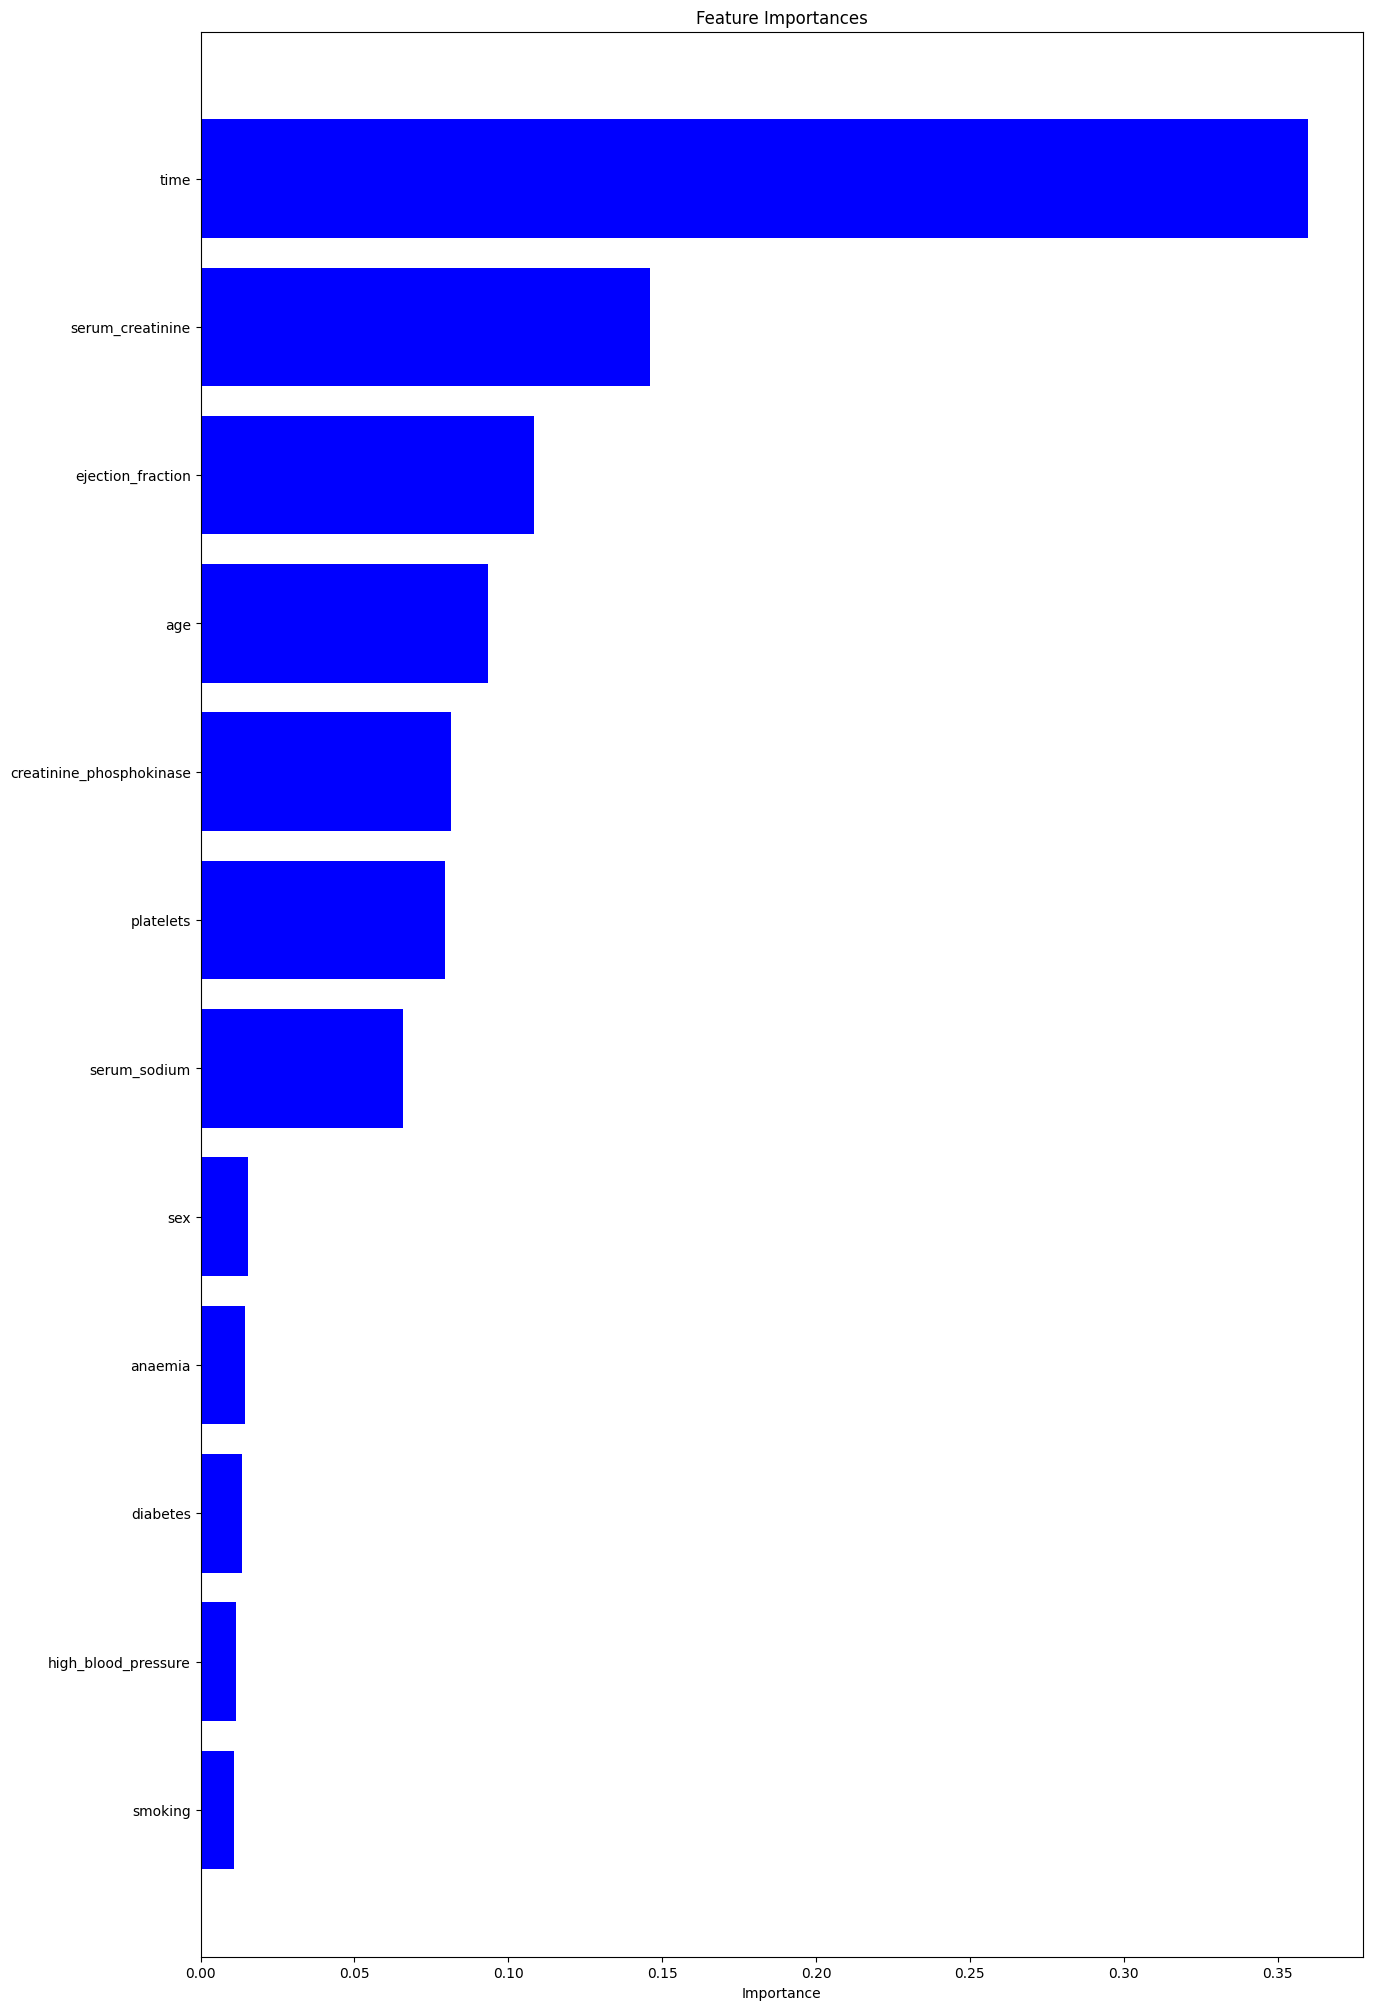

In [81]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()